# 데이터 분석에 앞서, 팀 소개와 인사말

In [6]:
from IPython.display import Image

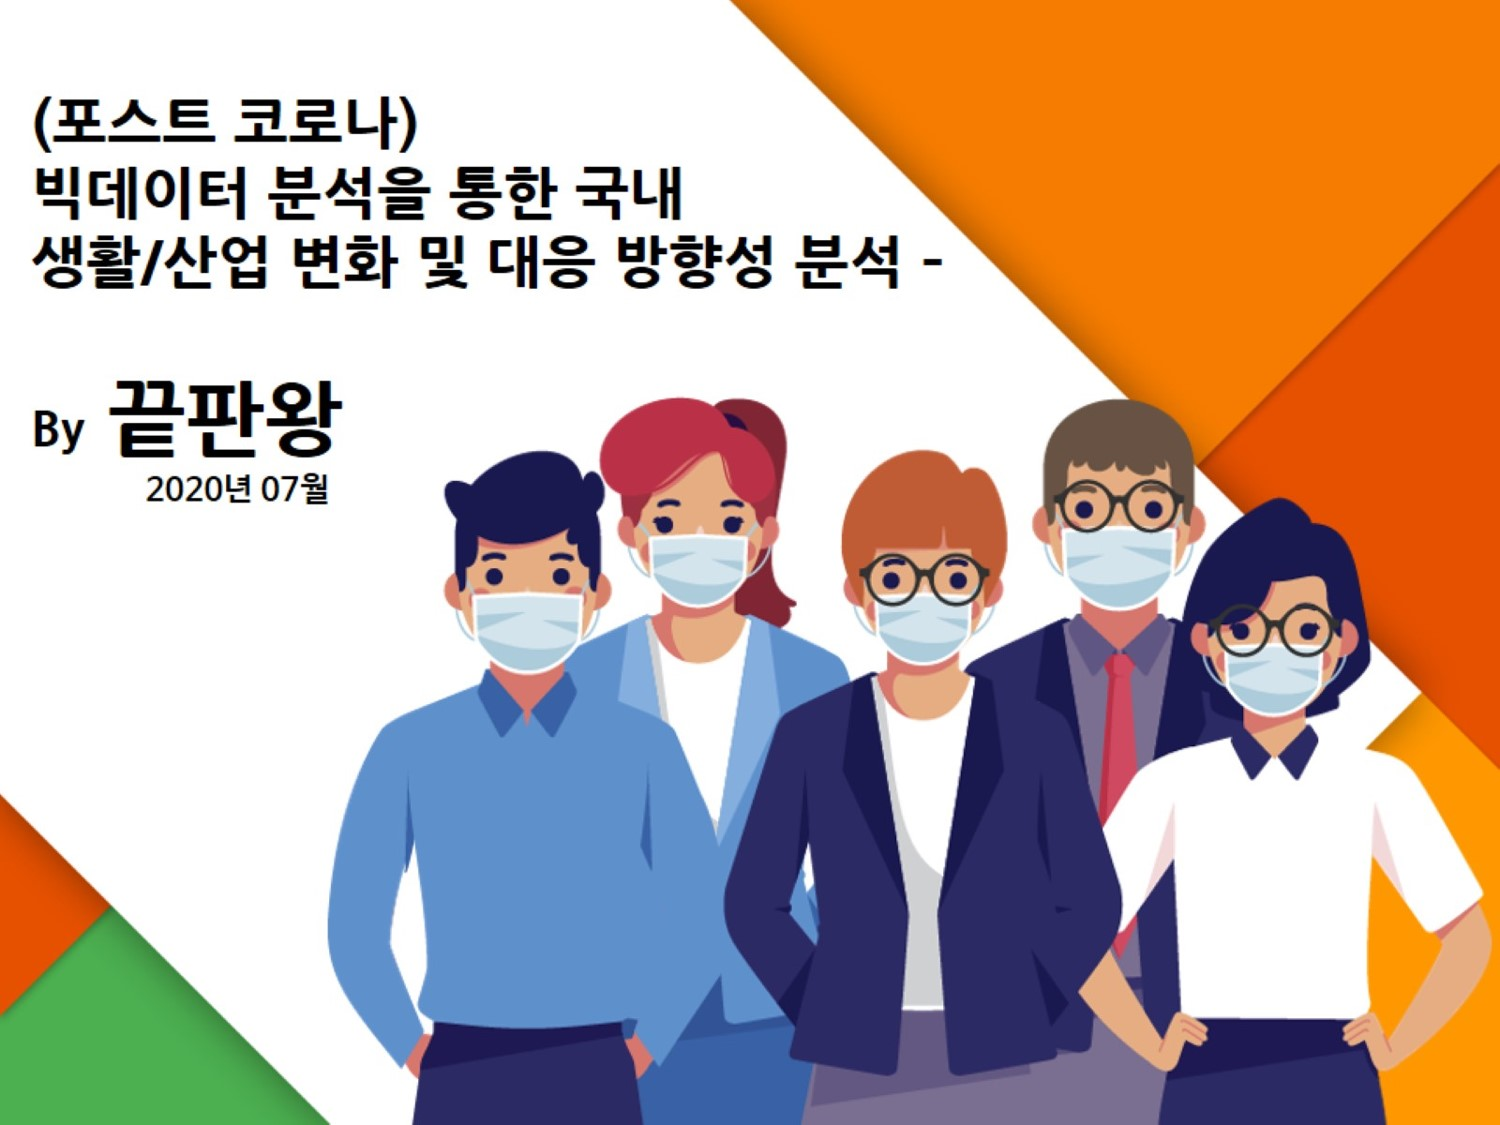

In [8]:
Image("PPT_IMG/00.표지_1.jpg")

#### 안녕하세요, 저희는 빅데이터를 분석하고자하는 열정으로 모인 5명의 학생, 끝판왕입니다.
#### 빅데이터를 위해 노력중인 모든 분들의 편에서 함께 노력하는 끝판왕 팀이 되겠습니다.

# Ⅰ 연구 개요

## 1. 연구의 배경 및 필요성

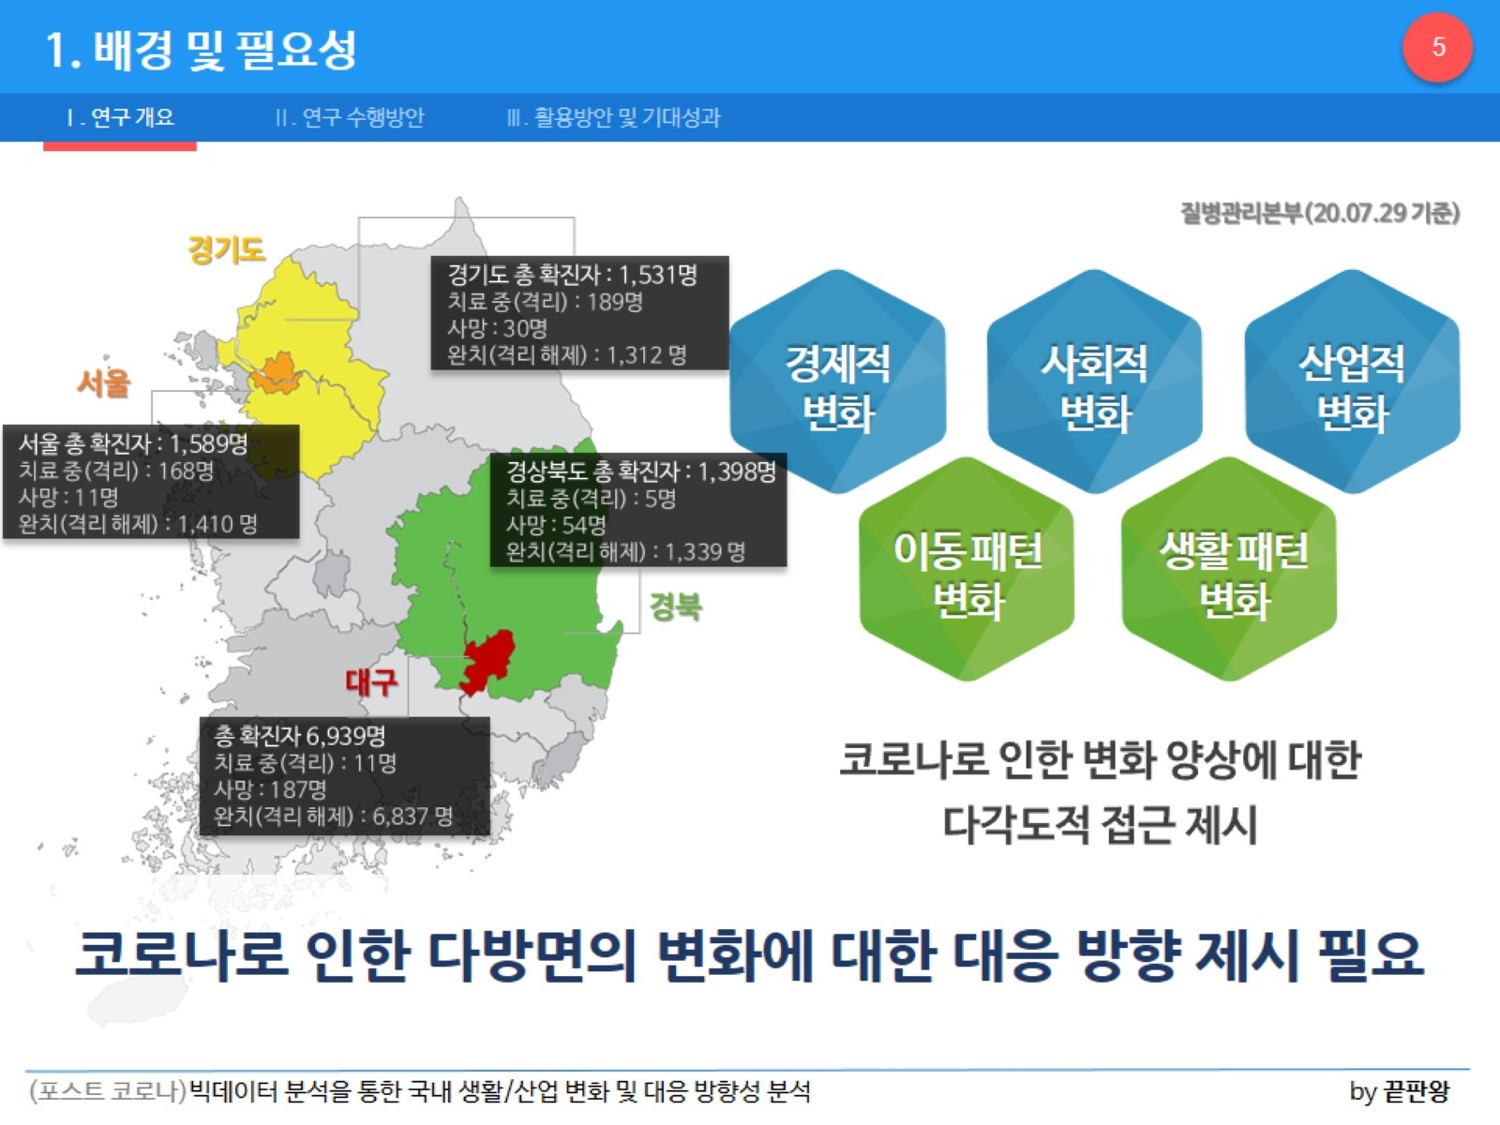

In [13]:
Image("PPT_IMG/04.배경및필요성_2.jpg")

- COVID-19(코로나바이러스 감염증-19, 이후 '코로나'로 통일)는 2019년 12월 중국을 시작으로 전세계로 퍼지며, 현재까지 크게 사회 및 경제적 변화, 생활 패턴의 변화 등을 비롯하여 실생활에 밀접한 영향을 주고있습니다.
- 코로나의 비말을 매개로 한 강력한 전파력은 사회적 거리두기를 필두로 사회 전반에 '언택트(비대면) 신드롬'을 불러일으키며 다양한 산업 분야의 판도를 좌지우지 하고 있습니다.
- 이에 따라 지속적으로 화두가 되고 있는 다양한 정부의 예방 정책들이 등장하였고, 코로나에 대응하기 위한 약 6개월의 시간과 데이터들이 축적되어 왔습니다.
- '포스트 코로나', 즉 코로나의 유행을 겪은 지금 이 시점에서  
`1) 코로나의 영향에 대한 다양한 분야의 데이터를 탐색하여 객관적인` **코로나의 영향력을 분석**하고,  
2) 현재까지 지속되고 있는 `다양한 대응책에 대한` **중간 검토를 통해 향후 더 나은 방향성 제시에 지표**`가 되고자 합니다.

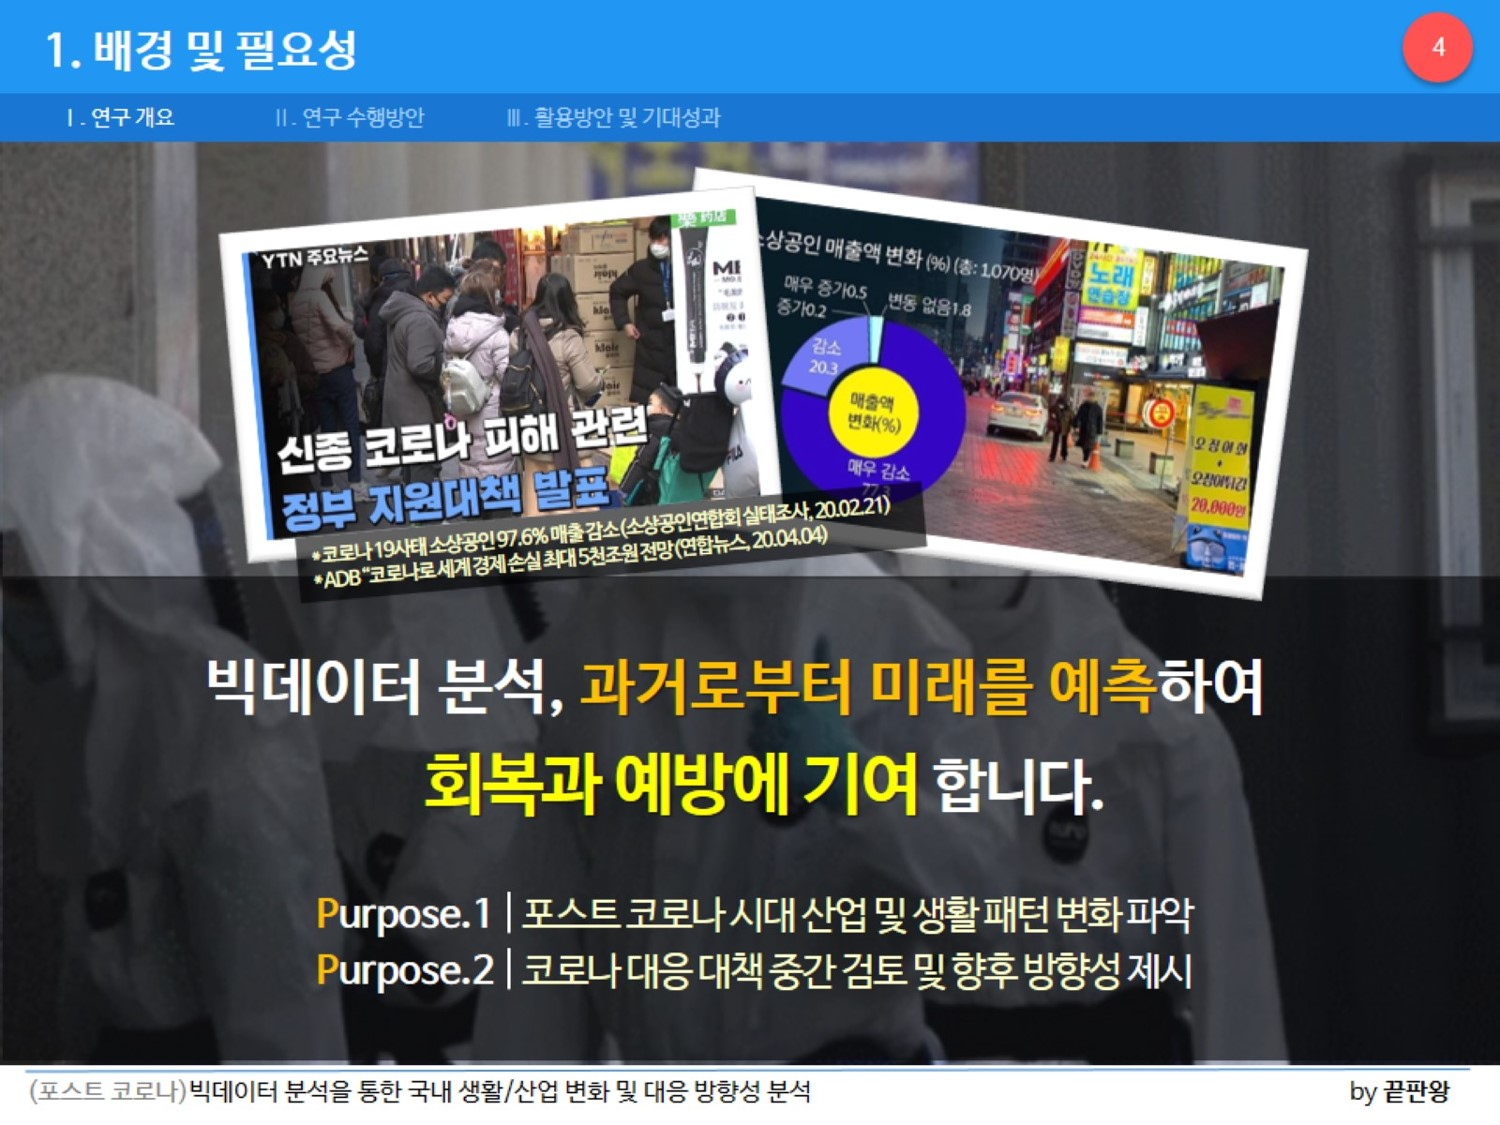

In [14]:
Image("PPT_IMG/03.배경및필요성.jpg")

## 2. 연구개요

## ○ 주제 
    ▶ 포스트 코로나 시대를 맞이하여 다양한 분야의 산업 및 생활 패턴의 객관적 변화 추이를 파악하여 실증적 현황 분석
    ▶ 현재까지 진행된 코로나 대응 대책과 양상에 대한 중간 체크를 통해 향후 대응 및 예방 방향성 제시

## ○ 가치
    ▶ 빅데이터를 기반으로 코로나가 미치는 영향을 보다 객관적이고 심층적으로 이해
    ▶ 데이터 분석을 통해 발굴한 인사이트의 높은 활용 가능성과 파급효과

## ○ 연구개요
    ▶ 활용 데이터 
        : 유동인구(fpopl.csv), 행정동(adstrd_master.csv), 코로나 확진자,  
          날짜 별 지역별 확진자 수(timeprovince.csv), 카드사용 발생건수 및 매출(card.csv) 데이터
          
    ▶ 분석 및 활용 데이터의 범위
        - 시간적 범위 : 20.01.01(수) ~ 20.6.16(화)
        - 공간적 범위 : 서울시 집중 분석 (파일럿 분석을 통해 전국 분석 범위 확산 가능성 제시)
        
    ▶ 분석 방안(사용 함수) : 파이썬을 기반으로 피어슨 상관분석을 중심으로 다양한 통계·수학적 분석 방안 활용

---

# Ⅱ 연구 수행

## 1. 유동인구 분석 및 그래프 시각화

### 1) 데이터 import 및 전처리

---

## 2. 소비패턴 분석 및 그래프 시각화

### 1) 데이터 import 및 전처리

In [21]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 유동인구 데이터 import 및 parameter 생성
card_raw = pd.read_csv("data/card_20200717.csv", encoding='utf-8')
card = card_raw
card.shape

(3713952, 7)

#### 데이터 전처리

In [14]:
# 데이터 오류 제거
errvals = ["석재", "커텐", "영상물", "복지매장", "축협직영매장"]

for errval in errvals:
    card = card.drop( card[card["selng_cascnt"] == errval].index )

# 구매건수, 구매총액 string type to int64
card["selng_cascnt"] = card["selng_cascnt"].astype("int64") 
card["salamt"] = card["salamt"].astype("int64") 

# 날짜 데이터 int type to datetime
card["receipt_dttm"] = pd.to_datetime(card["receipt_dttm"], format="%Y%m%d")

# '가맹점업종코드 앞 두 자리' 칼럼 추가(업종별로 묶기 위함)
card['mrhst_induty_cl_code'] = card['mrhst_induty_cl_code'].astype(str)
card['mrhst_induty_clm_code'] = card['mrhst_induty_cl_code'].str.slice(start=0, stop=2)

# 가맹점업종코드 앞 두 자리' 칼럼 순서 변경
card = card[['receipt_dttm',  'adstrd_code', 'adstrd_nm','mrhst_induty_clm_code', 'mrhst_induty_cl_code',
       'mrhst_induty_cl_nm', 'selng_cascnt', 'salamt']]

# 띄어쓰기 제거
card.mrhst_induty_cl_nm = card.mrhst_induty_cl_nm.str.replace(' ', '')

# 칼럼명 변경
card.rename(columns={'receipt_dttm':'카드사용접수일',
                            'adstrd_code':'가맹점행정코드',
                            'adstrd_nm':'가맹점행정동명',
                            'mrhst_induty_clm_code': '가맹점업종코드앞자리',
                            'mrhst_induty_cl_code':'가맹점업종코드',
                            'mrhst_induty_cl_nm':'가맹점업종명',
                            'selng_cascnt':'매출발생건수',
                            'salamt':'매출발생금액' }, inplace=True)

KeyError: 'selng_cascnt'

In [15]:
card.head()

,카드사용접수일,가맹점행정코드,가맹점행정동명,가맹점업종코드앞자리,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액
0,2020-01-04,1174066000,성내3동,70,7041,약국,463,5843230
1,2020-01-04,1174066000,성내3동,70,7022,치과의원,33,7835550
2,2020-01-04,1174066000,성내3동,70,7021,한의원,53,4589800
3,2020-01-04,1174066000,성내3동,70,7020,의원,339,9267240
4,2020-01-04,1174066000,성내3동,61,6110,자동차정비,19,4441000


In [16]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713952 entries, 0 to 3713951
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   카드사용접수일     datetime64[ns]
 1   가맹점행정코드     int64         
 2   가맹점행정동명     object        
 3   가맹점업종코드앞자리  object        
 4   가맹점업종코드     object        
 5   가맹점업종명      object        
 6   매출발생건수      int64         
 7   매출발생금액      int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 255.0+ MB


In [17]:
card.describe(include='all')

,카드사용접수일,가맹점행정코드,가맹점행정동명,가맹점업종코드앞자리,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액
count,3713952,3.713952e+06,3713952,3713952,3713952,3713952,3.713952e+06,3.713952e+06
unique,155,NaN,424,35,261,260,NaN,NaN
top,2020-05-22 00:00:00,NaN,신사동,80,8001,일반한식,NaN,NaN
freq,29683,NaN,23214,424411,65528,65528,NaN,NaN
first,2020-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-06-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.144507e+09,NaN,NaN,NaN,NaN,2.130553e+02,8.661771e+06
std,NaN,1.918899e+07,NaN,NaN,NaN,NaN,9.099785e+03,5.059716e+08
min,NaN,1.111052e+09,NaN,NaN,NaN,NaN,-1.892000e+03,-2.937331e+09
25%,NaN,1.126069e+09,NaN,NaN,NaN,NaN,2.000000e+00,1.150000e+05


In [18]:
card.sort_values('매출발생금액', ascending=False, inplace=True)
card.head()
#idx_str = card[card['매출발생금액'] == '철물'].value_counts()
#card = card.drop(idx_str)

,카드사용접수일,가맹점행정코드,가맹점행정동명,가맹점업종코드앞자리,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액
3223949,2020-05-28,1168065000,역삼2동,40,4078,인터넷Mall,2730,542173735297
314376,2020-01-29,1144055500,아현동,40,4076,인터넷P/G,400388,312747709648
323705,2020-01-29,1168065000,역삼2동,40,4078,인터넷Mall,23209,218598205392
1728056,2020-04-01,1168065000,역삼2동,40,4078,인터넷Mall,12550,216792376229
2616415,2020-05-05,1168065000,역삼2동,91,9161,조세서비스(특약),17533,189681865170


In [19]:
card['가맹점업종명'].value_counts()

일반한식         65528
서양음식         65499
편의점          65160
스넥           65007
미용원          64073
             ...  
카지노              8
통신기기무이자할부        8
택시회사             4
P2P송금            2
중고자동차위탁판매        1
Name: 가맹점업종명, Length: 260, dtype: int64

In [20]:
card['카드사용접수일'].value_counts()

2020-05-22    29683
2020-05-28    29672
2020-05-21    29612
2020-05-26    29582
2020-05-29    29508
              ...  
2020-01-05     8105
2020-01-12     8037
2020-01-20     5554
2020-01-13     5441
2020-01-06     5386
Name: 카드사용접수일, Length: 155, dtype: int64

In [21]:
card['가맹점업종명'].unique()

array(['인터넷Mall', '인터넷P/G', '조세서비스(특약)', '조세서비스', '이동통신요금', '기타전문점',
       '비영리/비대상', '생명보험', '국산신차', '손해보험', '택시', '인터넷종합Mall', '통신서비스/비대상',
       '상품권', '항공사', '출판인쇄물', '농축수산가공품', '제약회사', '학습지교육', '의료용품', '가전제품',
       'PG상품권', '상품권전문판매', '면세점', 'CATV홈쇼핑', '약국', '공공요금/대상', '공공요금',
       '영화관', '구내매점(국가기관등)', '연쇄점', '화장품', '특급호텔', '종합병원', '장례서비스',
       '소프트웨어', '의원', '비영리', '서양음식', '수입자동차', '대학등록금', '학원(회원제형태)',
       '전문서적', '자사카드발행백화점', '정수기', '일반한식', '기타용역서비스', '관광여행',
       '전자상거래상품권전문판매', '철도', '건강진단', '위성방송', '대형할인점', '농축수산품', '스포츠레져용품',
       '주유소', '기타음료식품', '기타교육', '종합용역', '전자상거래상품권', '정장', '콘도',
       '통신판매(일반)', '기타보험', '냉열기기', '일반서적', '통신서비스', '렌트카', '자체물품대금',
       '일반백화점', '사무서비스', '초중고교육기관', '고속버스', '슈퍼마켓', '악세사리', '정육점',
       '기타숙박업', '기타전기제품', '컴퓨터', '자동차정비', '기타건축자재', '여객선', '기타연료',
       '통신판매1', '화물운송', '보습학원', '정보서비스', '유류판매', '1급호텔', '유흥주점', '편의점',
       '스키장', '시계', '악기점', '기타비영리유통', '미용원', '2급호텔', '전자(상우회)', '안경',
       '과학기자재', '기타의료기관및기타의료기기',

# 탐색적 데이터 분석 및 시각화

## 횡단적 데이터 탐색

### 지역별 감염자 및 유동인구의 관계

### 지역별 감염자 및 소비 패턴 관계

## 코로나 전후 종단적 데이터 탐색

###  감염자 누적 및 지역별 유동인구 변화

### 업종별 소비 패턴의 변화

---

# Ⅲ 결론 및 인사이트 도출